# Explore BL Sessions Data

Here we introduce some useful DataJoint tools to explore the bl19 pipeline

First thing first, import datajoint

In [1]:
from scripts.conf_file_finding import try_find_conf_file
try_find_conf_file()
import numpy as np
import pylab as plt
import matplotlib.patches as mpatches
from matplotlib import cm
import datajoint as dj
import pandas as pd

Local configuration file found !!, no need to run the configuration (unless configuration has changed)


## Get handle to DBs

lab         =  researchers & rig DB <br />
subject     =  rats DB <br />
acquisition =  sessions DB

In [2]:
lab = dj.create_virtual_module('new_lab', 'bl_new_lab')   
subject = dj.create_virtual_module('new_subject', 'bl_new_subject')
acquisition = dj.create_virtual_module('new_acquisition', 'bl_new_acquisition')
bdata = dj.create_virtual_module('bdata', 'bdatatest')

Connecting alvaros@datajoint01.pni.princeton.edu:3306


In [3]:
subject_session_key = {'sessid': 812001}
session_data = (bdata.Sessions & subject_session_key).fetch('protocol_data', as_dict=True)
#session_data = (bdata.ParsedEvents & subject_session_key).fetch(as_dict=True)

dict_keys(['protocol_data'])

In [4]:
pd.DataFrame(session_data[0]['protocol_data'][0])

,hits,violations,cpoke1_tups,sounds,samples,memory_gaps,sides,rt_task,stims,reward_delay,bupsdata,stimdata,n_left,n_right,leftwatertime,rightwatertime
0,"[[1.0], [0.0], [1.0], [1.0], [0.0], [1.0], [1....","[[1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[1.0], [1.0], [1.0], [-1.0], [1.0], [1.0], [1...","[[nan], [nan], [0.8066210234281691], [nan], [n...","[[nan], [nan], [0.0], [nan], [nan], [nan], [0....","[[r], [r], [r], [l], [r], [r], [r], [r], [r], ...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0....","[[[[[0.01560091]], [[0.01560091 0.0229932 0.0...","[[[[[0.]], [[0.]], [[0.]], [[0.]], [[0.]], [[0...","[[0.0], [0.0], [2.0], [0.0], [0.0], [0.0], [1....","[[0.0], [0.0], [43.0], [0.0], [0.0], [0.0], [3...","[[nan], [nan], [nan], [590.0911020000001], [na...","[[529.5495530000001], [nan], [560.578354], [na..."



## Entity Relationship Diagram

All rats have an associated contact. <br />
All sessions have an associated rat, contact and rig. <br />
All (finished) session have a corresponding "started" session

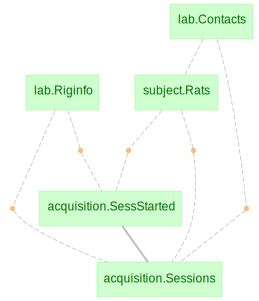

In [4]:
dj.ERD(acquisition.SessStarted) + dj.ERD(acquisition.Sessions) -1 

### Let's get some data from an experimenter

I will select Adrian as experiemnter 

In [5]:
lab.Contacts.fetch('experimenter')

array(['Audrey', 'Abby', 'Amy', 'Adrian', 'Adrianna', 'Annabelle',
       'Andres', 'Ahmed', 'Alvaro', 'Amir', 'Alice', 'Alex', 'AdrianS',
       'Athena', 'Scott', 'Cecilia', 'Ben', 'Anna', 'Carlos', 'Bing',
       'Ann', 'Christianne ', 'Tegan', 'Chuck', 'Courtney', 'Christine',
       'Cesar', 'Dmitriy', 'Dominic', 'Brian', 'Diksha', 'Dennis ',
       'Daniel', 'Daniel', 'Eran', 'Esneralda', 'Emily', 'EmilyR',
       'Edward', 'Evelyn', 'Fanny', 'Glyn', 'Nermin', 'JessB', 'Jeff',
       'Joshua', 'Joe', 'Jess', 'Josh', 'John', 'Tyler', 'Jovanna',
       'Jordan', 'Jon', 'Jorge', 'Jiyeon', 'Katrina', 'Kevin', 'Kanwal ',
       'Jack ', 'Lauren', 'Linhchi', 'Klaus', 'Lucas', 'Lillianne', 'Max',
       'Mitashee', 'Jo', 'Mark', 'Maya', 'Marino', 'Mariela', 'Melissa',
       'Manuel', 'Michael', 'Min', 'Nick', 'NickB', 'old_Lucas',
       'Shraddha', 'Peter', 'Alex', 'Ricki', 'Rina ', 'Ryan', 'RJ',
       'Sanjay', 'Sebastien', 'Sapna', 'Sergei', 'Sachi', 'Sam',
       'Sakeenah', 'Siam

Get user_id is for the experimenter

In [6]:
key = {'experimenter': 'Adrian'}
user_id = (lab.Contacts & key).fetch1('user_id')
user_id

'abondy'

### Select all subjects corresponding to experimenter

In [7]:
key_subject = {'user_id': user_id}
subject_experimenter_df = pd.DataFrame((subject.Rats & key_subject).fetch(as_dict=True))
subject_experimenter_df

,ratname,user_id,rats_old_id,free,comments,vendor,waterperday,recovering,deliverydate,extant,cagemate,force_free_water,date_sac,force_dep_water,larid,israt
0,A181,abondy,2393,0,,Hilltop,30.0,0,2017-01-31,0,,0,2018-03-26,0,None,1
1,A182,abondy,2394,0,LAR extension until 2019-04-01,Hilltop,30.0,0,2017-01-31,0,,0,2019-04-01,0,None,1
2,A183,abondy,2395,0,LAR extension until 2019-04-01 Water Pub Exclude,Hilltop,30.0,1,2017-01-31,0,,0,2019-03-04,0,None,1
3,A184,abondy,2396,0,Injected with AAV PHPeB GCAMP6f 2/15/18 - 100 ul,Hilltop,30.0,0,2017-01-31,0,,0,2019-02-08,0,None,1
4,A185,abondy,2397,0,LAR extension until 2019-04-01,Hilltop,30.0,1,2017-01-31,0,,0,2019-02-08,0,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,A325,abondy,3514,0,,Hilltop,30.0,0,2021-11-23,1,A324,0,None,0,None,1
140,A326,abondy,3515,0,,Hilltop,30.0,0,2021-11-23,1,A327,0,None,0,None,1
141,A327,abondy,3516,0,,Hilltop,30.0,0,2021-11-23,1,A326,0,None,0,None,1
142,A328,abondy,3517,0,,Hilltop,30.0,0,2021-11-23,1,A329,0,None,0,None,1


Let's select an example Rat and get the corresponding sessions

In [8]:
subject_session_key = {'session_rat': 'A321'}
sessions_df = pd.DataFrame((acquisition.Sessions & subject_session_key).fetch(as_dict=True))
sessions_df['session_date_dt'] = pd.to_datetime(sessions_df['session_date'], format='%Y-%m-%d')
sessions_df

,sessid,session_rat,session_userid,session_rigid,session_date,session_starttime,session_endtime,protocol,peh,n_done_trials,...,right_correct,left_correct,percent_violations,protocol_data,left_pokes,center_pokes,right_pokes,ip_addr,foodpuck,session_date_dt
0,816986,A321,abondy,19,2021-05-25,0 days 17:13:27,0 days 19:04:04,ProAnti3,None,26,...,0.00,0.58,0.00,None,786,102,110,128.112.223.205,0,2021-05-25
1,817153,A321,abondy,19,2021-05-26,0 days 16:48:21,0 days 18:47:33,ProAnti3,None,326,...,0.00,0.94,0.00,None,14096,548,462,128.112.223.205,0,2021-05-26
2,817256,A321,abondy,20,2021-05-27,0 days 18:35:41,0 days 18:36:20,ProAnti3,None,0,...,0.00,0.00,0.00,None,0,0,0,128.112.223.206,0,2021-05-27
3,817343,A321,abondy,20,2021-05-28,0 days 17:24:37,0 days 19:26:11,ProAnti3,None,104,...,0.84,0.00,0.00,None,84,32,2428,128.112.223.206,0,2021-05-28
4,817509,A321,abondy,18,2021-05-29,0 days 16:53:54,0 days 18:51:12,ProAnti3,None,130,...,0.86,0.63,0.00,None,3008,582,2550,128.112.223.203,0,2021-05-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,846112,A321,abondy,32,2021-12-10,0 days 17:00:16,0 days 18:38:53,PBups,None,333,...,0.89,0.88,0.43,None,4932,1390,4958,128.112.223.212,0,2021-12-10
149,846292,A321,abondy,32,2021-12-11,0 days 16:10:27,0 days 18:35:03,PBups,None,426,...,0.91,0.89,0.44,None,4776,1950,6918,128.112.223.212,0,2021-12-11
150,846457,A321,abondy,32,2021-12-12,0 days 16:03:35,0 days 18:26:43,PBups,None,116,...,0.83,0.80,0.34,None,1604,532,1240,128.112.223.212,0,2021-12-12
151,846636,A321,abondy,32,2021-12-13,0 days 16:49:33,0 days 18:37:15,PBups,None,402,...,0.86,0.92,0.30,None,3394,1632,6872,128.112.223.212,0,2021-12-13


## Plot performance of subject

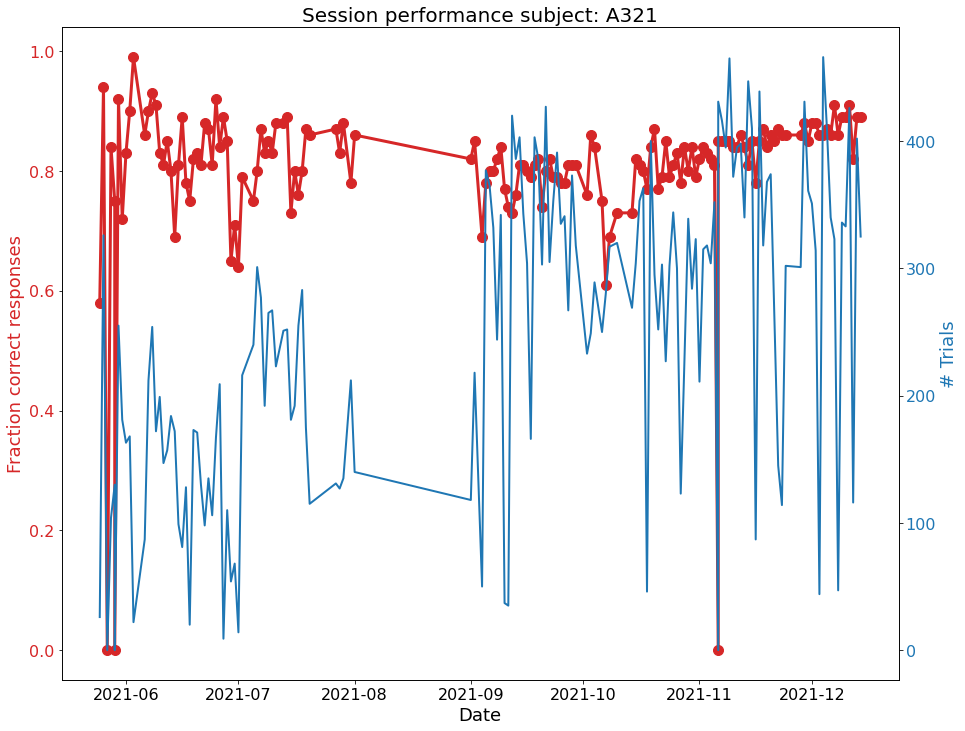

In [9]:
fig, axs = plt.subplots(1, 1, figsize=(15, 12))

color = 'tab:red'
axs.scatter(sessions_df['session_date_dt'], sessions_df['total_correct'], s=100, color = color)
axs.plot(sessions_df['session_date_dt'], sessions_df['total_correct'], linewidth=3, color = color)
axs.set_ylabel("Fraction correct responses", color=color, fontsize=18)
axs.tick_params(axis='y', labelcolor=color) 


plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Date", fontsize=18)
plt.title('Session performance subject: '+ subject_session_key['session_rat'], fontsize=20)


ax2 = axs.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('# Trials', color=color, fontsize=18)
ax2.plot(sessions_df['session_date_dt'], sessions_df['n_done_trials'], linewidth=2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.yticks(fontsize=16);


In [3]:
subject_session_key = {'sessid': 816986}
session_data = (bdata.Sessions & subject_session_key).fetch('protocol_data', as_dict=True)

read_blob


In [4]:
session_data

[{'sessid': 816986,
  'ratname': 'A321',
  'hostname': 'Rig19',
  'experimenter': 'Adrian',
  'starttime': datetime.timedelta(seconds=62007),
  'endtime': datetime.timedelta(seconds=68644),
  'sessiondate': datetime.date(2021, 5, 25),
  'n_done_trials': 26,
  'comments': ' ',
  'settings_file': '',
  'settings_path': '',
  'data_file': 'data_@ProAnti3_Adrian_A321_210525a',
  'data_path': 'C:\\ratter\\SoloData\\Data\\Adrian\\A321\\',
  'video_file': 'video_@ProAnti3_Adrian_A321_210525a.mp4',
  'video_path': 'X:\\RATTER\\Video\\Adrian\\A321',
  'protocol': 'ProAnti3',
  'total_correct': 0.58,
  'right_correct': 0.0,
  'left_correct': 0.58,
  'percent_violations': 0.0,
  'brokenbits': 0,
  'protocol_data': b'ZL123\x007\x04\x00\x00x\x9c\xcb\x8d\xcce\x08fb```\x84b> .\xceLI-f\xc8\xc8,a\xc8\xc9OfH.(a\x08(\xca\xf7\x89O\xce\x033\x82\xc0\x0c\xc7\xbc\x12\x1f\x18#\x08&\xe5\x13_\x90Z\x94\x06Q\x04f\x81U\xc1XP1\xdf\xcc<?Og\x06\xdf\xc4\n\x10\xe5\t\xb4\xcf\x11\xe4\x00)\xa8\x03X\x18  \x87\x0c\xf8\x14\xd

In [5]:
la = lolo[0]['protocol_data'].decode("utf-8") 
la

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 11: invalid start byte

In [10]:
import chardet

the_encoding = chardet.detect(lolo[0]['protocol_data'])

In [11]:
the_encoding

{'encoding': None, 'confidence': 0.0, 'language': None}

In [17]:
f = open("tempmat.mat", "wb")
f.write(session_data[0]['protocol_data'])
f.close()

In [13]:
import scipy.io as sio

In [14]:
mat_contents = sio.loadmat("tempmat.mat")

ValueError: Unknown mat file type, version 124, 92